In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
tf.set_random_seed(777)

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [5]:
X = tf.placeholder(tf.float32, [None,784])
Y = tf.placeholder(tf.float32, [None, 10])

In [7]:
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

In [8]:
learning_rate = 0.001
batch_size = 100
num_epochs = 50
num_iterations = int(mnist.train.num_examples / batch_size)

In [9]:
hypothesis = tf.matmul(X, W) + b

In [10]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=tf.stop_gradient(Y)))

In [12]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [13]:
correct_prediction = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [16]:
for epoch in range(training_epochs):
    avg_cost = 0
    for iteration in range(num_iterations):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={X:batch_xs, Y:batch_ys})
        avg_cost += c / num_iterations
    print(f"Epoch: {(epoch + 1):04d}, cost: {avg_cost:.9f}")
print("Learning Finished!")

print("Accuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

Epoch: 0001, cost: 0.403163463
Epoch: 0002, cost: 0.393369304
Epoch: 0003, cost: 0.384171326
Epoch: 0004, cost: 0.376288350
Epoch: 0005, cost: 0.368670344
Epoch: 0006, cost: 0.362160258
Epoch: 0007, cost: 0.355490181
Epoch: 0008, cost: 0.349609751
Epoch: 0009, cost: 0.343996830
Epoch: 0010, cost: 0.338807652
Epoch: 0011, cost: 0.333915346
Epoch: 0012, cost: 0.329876253
Epoch: 0013, cost: 0.325569468
Epoch: 0014, cost: 0.321236788
Epoch: 0015, cost: 0.317653586
Learning Finished!
Accuracy: 0.909


In [18]:
#Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)

print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], axis=1)))

Label:  [3]


In [22]:
print("Prediction: ", sess.run(tf.argmax(hypothesis, axis=1), feed_dict={X: mnist.test.images[r:r+1]}))

Prediction:  [3]


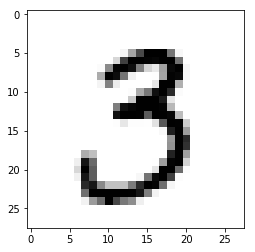

In [25]:
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap="Greys", interpolation="nearest")
plt.show()